### Exploratory Data Analysis (EDA):
According to Sahoo *et al*. (2019, p.4727), Exploratory Data Analysis can describe the data sets, such as several rows/columns, missing data, data types, and so on, inclusively cleaning corrupted data. Besides that, measures of mean, mode, median, standard deviation, variance, distribution and the existence of outliers are essential aspects of the EDA (Sahoo *et al*., 2019, p.4727; Sagala and Aryatama, 2022, p.579).

Exploratory Data Analysis is helpful to increase the understanding of the dataset because it analyses and summarize the main characteristics of the dataset and also by using data visualization such as Histograms, Box plot, Scatter plots and others (Sagala and Aryatama, 2022, p.579).


### Characterisation of the dataset:
Data Characterization is part of Exploratory Data Analysis (EDA); it describes the data and can be referenced as metadata ("data about data"), which is the data characteristics, for example, data type, size, distribution and pattern (Panzner *et al*., 2022, p.7). The purpose of the data characterization is to examine and understand the fundamental characteristics and properties of a dataset to gain insights about the data.

This dataset contains 60,000 observations, 170 numerical features and 1 categorical feature. This feature is presented with ‘pos’ when the failure in components is related to a specific APS system, and 'neg' when this failure is not associated with the APS system. 
I also found that the dataset contains more than 99% of the missing values; consequently, instead of removing them, I had to input them with a median or interpolation because the dataset was skewed. For the first time, I used the median, but some variables showed values so far from the original dataset, and because of this, I used the interpolation values.
The dataset is highly imbalanced or skewed because approximately 98% are represented in the 'neg' class, while 2% are in the 'pos' class. This can be a problem when applying machine learning models because it will likely produce biased predictions. 

### Curse of Dimensionality:
I would say that the Curse of Dimensionality is a dilemma, because it is always important to have more data to improve the accuracy of a model. However,  when we increase the number of features, we are increasing the number of dimensions and decreasing the number of observations. 
This lead to another problem, which is the need for more understanding and explicability because when the dataset has too many dimension (features), it isn't easy to understand what the data is trying to say. 
To deal with this problem, we have the Principal Component Analysis (PCA), a method to reduce the dimension of the data, maintaining its pattern.



To start the EDA, I will import all the libraries I will use, such as Pandas, for functions and methods to manipulate the data in this library and Numpy to solve mathematical problems.

In [1]:
%matplotlib inline
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

I used the 'pd.read_csv' method to access the file that I want to work with.

In [2]:
df = pd.read_csv("aps_failure_set.csv")

I used the 'head' method to view the file.

In [3]:
df.head()

,class,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,neg,76698,na,2130706438,280,0,0,0,0,0,...,1240520,493384,721044,469792,339156,157956,73224,0,0,0
1,neg,33058,na,0,na,0,0,0,0,0,...,421400,178064,293306,245416,133654,81140,97576,1500,0,0
2,neg,41040,na,228,100,0,0,0,0,0,...,277378,159812,423992,409564,320746,158022,95128,514,0,0
3,neg,12,0,70,66,0,10,0,0,0,...,240,46,58,44,10,0,0,0,4,32
4,neg,60874,na,1368,458,0,0,0,0,0,...,622012,229790,405298,347188,286954,311560,433954,1218,0,0


I used the method df.shape to have an idea of the dataset size. And I found that this dataset has 60000 rows and 171 columns.

In [4]:
df.shape

(60000, 171)

With the describe() method, I can see that this dataset is skewed by comparing the values of mean and median (50% value). Thus, I will start the cleaning process but take care not to distort the data. 

In [5]:
df.describe()

,aa_000
count,6.000000e+04
mean,5.933650e+04
std,1.454301e+05
min,0.000000e+00
25%,8.340000e+02
50%,3.077600e+04
75%,4.866800e+04
max,2.746564e+06


### Cleaning the dataset

The method df.info() gave me an idea about the values inside the dataset.

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60000 entries, 0 to 59999
Columns: 171 entries, class to eg_000
dtypes: int64(1), object(170)
memory usage: 78.3+ MB


After run the df.info() method I realized that the dataset has 170 features denominated as object which means that in this feature there are values that are string or sinalized as 'NaN' by the programm for unkown values.

I used the unique() method to obtain all kind of data that there is inside of column "class". As a result is showed that I have strings in this column with two types: 'neg' and 'pos'. 

In [7]:
df["class"].unique()

array(['neg', 'pos'], dtype=object)

The method miss_val_formats call a list of strings that have some possible formats that might be used to indicate missing or invalid data in the dataset. Then the code below will search on the entire dataset for all the data that are in the list 'miss_val_formats' which may represent missing or invalid data and place them with 'NaN', which means not a number.

In [8]:
miss_val_formats = ["n.a.", "?", "NA", "n/a", "na", "--"]

In [9]:
df = pd.read_csv("aps_failure_set.csv", na_values=miss_val_formats)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60000 entries, 0 to 59999
Columns: 171 entries, class to eg_000
dtypes: float64(169), int64(1), object(1)
memory usage: 78.3+ MB


In [11]:
df.dtypes

class      object
aa_000      int64
ab_000    float64
ac_000    float64
ad_000    float64
           ...   
ee_007    float64
ee_008    float64
ee_009    float64
ef_000    float64
eg_000    float64
Length: 171, dtype: object

In [12]:
df["class"].value_counts()

neg    59000
pos     1000
Name: class, dtype: int64

After running the method info() again, I saw that the data types have changed. There are float, integer, and object (string) because there was probably missing or invalid data that changed columns with float values in string columns.

Now I am using the code df.isnull().sum() to calculate the numbers of missing (null and NaN) values in all columns of the dataset. As result I found that there are a lot of missing values, for example in the column ab_000 there are 46329 records missing (null and NaN). 
Considering that this dataset has a huge amount of missing values I will not allowed to use the code df.dropna(axis=0) because if I do it I will lose the confiability on the information that this dataset have.
Just for instance if I follow this pathway I will get a dataset with only 591 rows, which means that I would lose more than 99% of the dataset.

In [13]:
df.isnull().sum()

class         0
aa_000        0
ab_000    46329
ac_000     3335
ad_000    14861
          ...  
ee_007      671
ee_008      671
ee_009      671
ef_000     2724
eg_000     2723
Length: 171, dtype: int64

In [14]:
new_df = df.dropna(axis=0)

In [15]:
new_df.isnull().sum()

class     0
aa_000    0
ab_000    0
ac_000    0
ad_000    0
         ..
ee_007    0
ee_008    0
ee_009    0
ef_000    0
eg_000    0
Length: 171, dtype: int64

In [16]:
new_df.shape

(591, 171)

Above is shown that after proceeding that pathway I ended up with only 591 records (rows). In this case I wil use another solution to replace those missing values.

When I repeated the process above, I saw that instead of the dataset having 171 columns, it became only 2 columns, meaning that 169 were deleted from the dataset.

In [17]:
df.shape

(60000, 171)

In [18]:
new_df = df.dropna(axis=1)

In [19]:
new_df.shape

(60000, 2)

Now I will again access the original dataframe (df) and apply the fillna method to replace all missing data.

In [20]:
df.shape

(60000, 171)

### Inputing data with median values

According to df.describe(), we can see that the data is skewed. Therefore, it is recommended to use the **median** to replace missing values, as it provides a better representation of the majority of the variable's values. In contrast, the mean is influenced by values at the extreme of the distribution.

I opted not to use the "warnings.filterwarnings" to suppress alerts because some can be useful during my analysis.

In [21]:
df2 = df.fillna(df.median())

C:\Users\danie\AppData\Local\Temp\ipykernel_47240\2636348673.py:1: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df2 = df.fillna(df.median())


In [22]:
df2.head()

,class,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,neg,76698,0.0,2.130706e+09,280.0,0.0,0.0,0.0,0.0,0.0,...,1240520.0,493384.0,721044.0,469792.0,339156.0,157956.0,73224.0,0.0,0.0,0.0
1,neg,33058,0.0,0.000000e+00,126.0,0.0,0.0,0.0,0.0,0.0,...,421400.0,178064.0,293306.0,245416.0,133654.0,81140.0,97576.0,1500.0,0.0,0.0
2,neg,41040,0.0,2.280000e+02,100.0,0.0,0.0,0.0,0.0,0.0,...,277378.0,159812.0,423992.0,409564.0,320746.0,158022.0,95128.0,514.0,0.0,0.0
3,neg,12,0.0,7.000000e+01,66.0,0.0,10.0,0.0,0.0,0.0,...,240.0,46.0,58.0,44.0,10.0,0.0,0.0,0.0,4.0,32.0
4,neg,60874,0.0,1.368000e+03,458.0,0.0,0.0,0.0,0.0,0.0,...,622012.0,229790.0,405298.0,347188.0,286954.0,311560.0,433954.0,1218.0,0.0,0.0


In [23]:
df2.shape

(60000, 171)

In [24]:
df2.isnull().sum()

class     0
aa_000    0
ab_000    0
ac_000    0
ad_000    0
         ..
ee_007    0
ee_008    0
ee_009    0
ef_000    0
eg_000    0
Length: 171, dtype: int64

In [25]:
df2.shape

(60000, 171)

In [26]:
df2.describe()

,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,ag_003,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
count,6.000000e+04,60000.000000,6.000000e+04,6.000000e+04,60000.000000,60000.000000,6.000000e+04,6.000000e+04,6.000000e+04,6.000000e+04,...,6.000000e+04,6.000000e+04,6.000000e+04,6.000000e+04,6.000000e+04,6.000000e+04,6.000000e+04,6.000000e+04,60000.000000,60000.000000
mean,5.933650e+04,0.162500,3.362258e+08,1.434383e+05,6.535000,10.548200,2.191577e+02,9.648104e+02,8.509771e+03,8.760054e+04,...,4.431223e+05,2.100188e+05,4.432268e+05,3.916653e+05,3.303672e+05,3.428586e+05,1.372212e+05,8.295099e+03,0.086467,0.203100
std,1.454301e+05,1.687318,7.767625e+08,3.504525e+07,158.147893,205.387115,2.036364e+04,3.400891e+04,1.494818e+05,7.575171e+05,...,1.149276e+06,5.403725e+05,1.162002e+06,1.114964e+06,1.063465e+06,1.718666e+06,4.472145e+05,4.721249e+04,4.268570,8.628043
min,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000
25%,8.340000e+02,0.000000,2.000000e+01,4.200000e+01,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,3.033500e+03,1.204000e+03,2.848500e+03,3.839000e+03,5.600000e+02,1.180000e+02,0.000000e+00,0.000000e+00,0.000000,0.000000
50%,3.077600e+04,0.000000,1.520000e+02,1.260000e+02,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,2.337960e+05,1.120860e+05,2.215180e+05,1.899880e+05,9.243200e+04,4.109800e+04,3.812000e+03,0.000000e+00,0.000000,0.000000
75%,4.866800e+04,0.000000,8.480000e+02,2.920000e+02,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,4.350315e+05,2.164440e+05,4.624655e+05,4.003010e+05,2.725220e+05,1.663465e+05,1.367255e+05,1.934000e+03,0.000000,0.000000
max,2.746564e+06,204.000000,2.130707e+09,8.584298e+09,21050.000000,20070.000000,3.376892e+06,4.109372e+06,1.055286e+07,6.340207e+07,...,7.793393e+07,3.775839e+07,9.715238e+07,5.743524e+07,3.160781e+07,1.195801e+08,1.926740e+07,3.810078e+06,482.000000,1146.000000


In [27]:
df2.shape

(60000, 171)

### Inputing data with interpolation values

After replacing the missing values with the median of each variable, there were no more null or missing values, but the variables remained skewed.
However, variables like 'ab_000' and 'ef_000' have shown values so far from the original dataset, meaning that the input with median was less effective than I imagined.  
In this case, it will be necessary to use **Interpolation**, which performs linear Interpolation on missing data points.

In [28]:
df.shape

(60000, 171)

In [29]:
df3 = df.interpolate(method="linear", direction="forward")

In [30]:
df3.describe()

,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,ag_003,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
count,6.000000e+04,59997.000000,6.000000e+04,6.000000e+04,60000.000000,60000.000000,6.000000e+04,6.000000e+04,6.000000e+04,6.000000e+04,...,6.000000e+04,6.000000e+04,6.000000e+04,6.000000e+04,6.000000e+04,6.000000e+04,6.000000e+04,6.000000e+04,60000.000000,60000.000000
mean,5.933650e+04,0.701035,3.565030e+08,1.435263e+05,6.886533,11.100517,2.203502e+02,9.691852e+02,8.571722e+03,8.844413e+04,...,4.453309e+05,2.110075e+05,4.454135e+05,3.935807e+05,3.327470e+05,3.455027e+05,1.386618e+05,8.386621e+03,0.090400,0.211217
std,1.454301e+05,2.650264,7.837943e+08,3.504525e+07,160.644593,208.515341,2.036531e+04,3.401127e+04,1.495479e+05,7.589686e+05,...,1.152805e+06,5.421643e+05,1.164657e+06,1.116694e+06,1.065782e+06,1.720842e+06,4.487702e+05,4.736593e+04,4.321733,8.660519
min,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000
25%,8.340000e+02,0.000000,1.800000e+01,3.200000e+01,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,2.992000e+03,1.192000e+03,2.790000e+03,3.751500e+03,5.420000e+02,1.160000e+02,0.000000e+00,0.000000e+00,0.000000,0.000000
50%,3.077600e+04,0.000000,1.620000e+02,1.500000e+02,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,2.341870e+05,1.122220e+05,2.219390e+05,1.906900e+05,9.407350e+04,4.185700e+04,4.129000e+03,0.000000e+00,0.000000,0.000000
75%,4.866800e+04,0.800000,1.042000e+03,4.460000e+02,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,4.386280e+05,2.183070e+05,4.666820e+05,4.031165e+05,2.749965e+05,1.676955e+05,1.397620e+05,2.062500e+03,0.000000,0.000000
max,2.746564e+06,204.000000,2.130707e+09,8.584298e+09,21050.000000,20070.000000,3.376892e+06,4.109372e+06,1.055286e+07,6.340207e+07,...,7.793393e+07,3.775839e+07,9.715238e+07,5.743524e+07,3.160781e+07,1.195801e+08,1.926740e+07,3.810078e+06,482.000000,1146.000000


In [31]:
df3.isnull().sum()

class     0
aa_000    0
ab_000    3
ac_000    0
ad_000    0
         ..
ee_007    0
ee_008    0
ee_009    0
ef_000    0
eg_000    0
Length: 171, dtype: int64

When I compare the descriptive parameters between the original dataset (df) and the dataset with interpolation values (df3), I see that these parameters are still similar, but with the advantage that the missing values are only present in a few rows.
Now, I will drop these values without losing the integrity of the dataset.
Below, you can see that I only removed 13 rows, less than 0.1% of the total amount of the dataset, which is insignificant.

In [32]:
df4 = df3.dropna(axis=0)

In [33]:
df4.isnull().sum()

class     0
aa_000    0
ab_000    0
ac_000    0
ad_000    0
         ..
ee_007    0
ee_008    0
ee_009    0
ef_000    0
eg_000    0
Length: 171, dtype: int64

In [34]:
df4.shape

(59987, 171)

I will use the duplicated() method to eliminate records that may be duplicated. However in this dataset there is no duplicates as we can see below.

In [35]:
df4.duplicated().sum()

0

I used the value_counts() method to find out how many observations we have in each of these classes, positive and negative.
As we can see, we have 999 records for positive class, meaning that occurrences are related to a failure in components specifics of the APS system. In contrast, the remainder, 58988 records (negative), means that the truck's failure in components is unrelated to the APS system. In other words, approximately 98% of the component failures are not due to the APS system.

In [36]:
df4["class"].value_counts()

neg    58988
pos      999
Name: class, dtype: int64

I will import the Seaborn data visualization library to make the histogram; thus, that difference will be visualized.

<Axes: xlabel='class', ylabel='Count'>

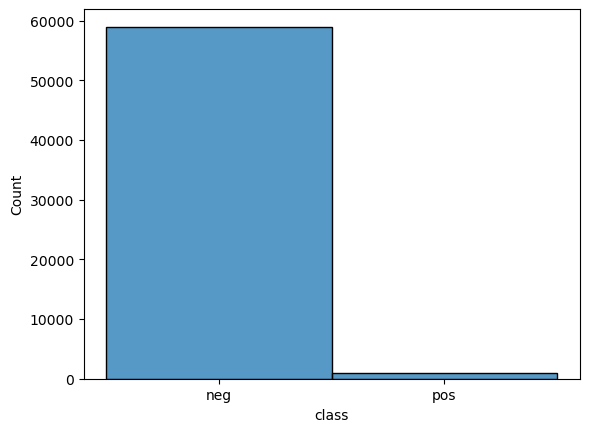

In [37]:
sns.histplot(data=df4, x="class")

### Focusing on Positive Class

Considering that the company wants to know about the specific component failures related to the APS system, I need to focus the analysis in this class ('pos'), which is around 2% of the total dataset.
To proceed, I will create a subset of the dataset (df4) that only contains data of the positive class.
Below, the methods "shape and unique" certify that the subset contains exclusively the positive class.

In [38]:
by_category = df4.groupby('class')
subset = by_category.get_group('pos')
print(subset)

      class   aa_000    ab_000        ac_000       ad_000  ae_000  af_000  \
23      pos   453236  0.000000  2.926000e+03  1420.000000     0.0     0.0   
60      pos    72504  0.000000  1.594000e+03  1052.000000     0.0     0.0   
115     pos   762958  0.000000  1.065353e+09    98.000000     0.0     0.0   
135     pos   695994  1.000000  1.300000e+01    12.000000     0.0     0.0   
156     pos  1056758  0.000000  4.232800e+04   856.000000     0.0     0.0   
...     ...      ...       ...           ...          ...     ...     ...   
59484   pos   895178  0.000000  1.065353e+09    19.000000     0.0     0.0   
59601   pos   862134  3.384615  1.840000e+02   420.000000     0.0     0.0   
59692   pos   186856  0.000000  1.065353e+09   982.666667     0.0     0.0   
59742   pos   605092  1.818182  1.420471e+09    28.666667     0.0     0.0   
59769   pos   331704  0.000000  1.484000e+03  1142.000000     0.0     0.0   

       ag_000    ag_001     ag_002  ...     ee_002     ee_003     ee_004  \

Using the code below, the 'pos' class will be represented by the number 1. It is important because PCA and machine learning models handle numbers; otherwise, this feature will not be recognised. 

In [39]:
subset['class'].replace('pos', 1, inplace = True)
print(subset['class'])

23       1
60       1
115      1
135      1
156      1
        ..
59484    1
59601    1
59692    1
59742    1
59769    1
Name: class, Length: 999, dtype: int64


C:\Users\danie\AppData\Local\Temp\ipykernel_47240\2464997387.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset['class'].replace('pos', 1, inplace = True)


In [40]:
subset.shape

(999, 171)

In [41]:
subset["class"].unique()

array([1], dtype=int64)

In [42]:
subset.head()

,class,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
23,1,453236,0.0,2.926000e+03,1420.0,0.0,0.0,0.0,0.0,222.0,...,7908038.0,3026002.0,5025350.0,2025766.0,1160638.0,533834.0,493800.0,6914.0,0.0,0.0
60,1,72504,0.0,1.594000e+03,1052.0,0.0,0.0,0.0,244.0,178226.0,...,1432098.0,372252.0,527514.0,358274.0,332818.0,284178.0,3742.0,0.0,0.0,0.0
115,1,762958,0.0,1.065353e+09,98.0,0.0,0.0,776.0,281128.0,2186308.0,...,179282.0,85194.0,192889.0,209641.0,115781.0,63662.0,86572.0,7663.0,0.0,0.0
135,1,695994,1.0,1.300000e+01,12.0,0.0,0.0,0.0,0.0,0.0,...,1397742.0,495544.0,361646.0,28610.0,5130.0,212.0,0.0,0.0,0.0,0.0
156,1,1056758,0.0,4.232800e+04,856.0,0.0,0.0,0.0,50394.0,184552.0,...,1450086.0,713608.0,1750894.0,4054554.0,4096660.0,2295880.0,220478.0,482.0,0.0,0.0


In [43]:
subset.describe()

,class,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
count,999.0,9.990000e+02,999.000000,9.990000e+02,999.000000,999.000000,999.000000,999.000000,9.990000e+02,9.990000e+02,...,9.990000e+02,9.990000e+02,9.990000e+02,9.990000e+02,9.990000e+02,9.990000e+02,9.990000e+02,9.990000e+02,999.000000,999.000000
mean,1.0,6.596801e+05,0.950826,1.939126e+08,1082.828462,14.934268,42.385719,2153.439439,5.093166e+04,3.992401e+05,...,4.368361e+06,1.993090e+06,4.162920e+06,4.557631e+06,3.727185e+06,2.461809e+06,9.472356e+05,5.039849e+04,0.540541,1.066066
std,0.0,4.343059e+05,5.408213,4.886145e+08,3428.779917,191.543154,516.616354,22211.974371,2.557236e+05,9.986194e+05,...,4.242721e+06,2.131283e+06,4.508443e+06,5.564934e+06,4.598109e+06,3.987306e+06,2.175600e+06,2.204516e+05,11.835636,20.364210
min,1.0,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000
25%,1.0,3.203520e+05,0.000000,7.800000e+01,96.733333,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,...,1.130900e+06,4.716790e+05,9.078210e+05,8.346860e+05,5.183860e+05,1.390990e+05,7.410000e+03,0.000000e+00,0.000000,0.000000
50%,1.0,5.849940e+05,0.000000,6.030000e+02,298.000000,0.000000,0.000000,0.000000,0.000000e+00,1.942000e+03,...,2.930346e+06,1.283518e+06,2.526192e+06,2.699056e+06,2.126150e+06,9.094160e+05,6.461200e+04,8.000000e+00,0.000000,0.000000
75%,1.0,9.308770e+05,1.000000,3.324000e+03,791.500000,0.000000,0.000000,0.000000,7.762000e+03,3.704400e+05,...,6.585235e+06,2.928538e+06,5.916142e+06,6.457021e+06,5.423092e+06,3.090390e+06,4.757940e+05,1.968000e+03,0.000000,0.000000
max,1.0,2.746564e+06,153.000000,2.130706e+09,60466.000000,5386.000000,11284.000000,544866.000000,4.109372e+06,1.055286e+07,...,3.123272e+07,1.454922e+07,2.700915e+07,5.743524e+07,3.160781e+07,2.605551e+07,1.926740e+07,3.810078e+06,362.000000,606.000000


### Checking for outliers

As I saw previously, this subset is skewed; thus, there is the possibility that there are many outliers. To check it, I will calculate the Interquartile Range (IQR) using the first and third-quartile values. Then, I will use the boxplot graphic to visualize some features, and finally, I will identify and remove the outliers if it does not affect the integrity of the dataset.

In [44]:
Q1 = subset.quantile(0.25)
Q3 = subset.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

class     0.000000e+00
aa_000    6.105250e+05
ab_000    1.000000e+00
ac_000    3.246000e+03
ad_000    6.947667e+02
              ...     
ee_007    2.951291e+06
ee_008    4.683840e+05
ee_009    1.968000e+03
ef_000    0.000000e+00
eg_000    0.000000e+00
Length: 171, dtype: float64


Boxplot graphics represent the data concentration, such as central tendency, symmetry, skew and outlier. (Sahoo et al., 2019, p.4728).
Below are three boxplot graphics to illustrate the outliers in some features.

<Axes: xlabel='aa_000'>

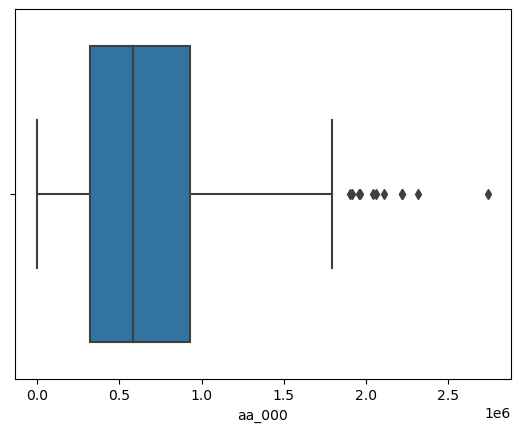

In [45]:
sns.boxplot(x=subset['aa_000'])

<Axes: xlabel='ab_000'>

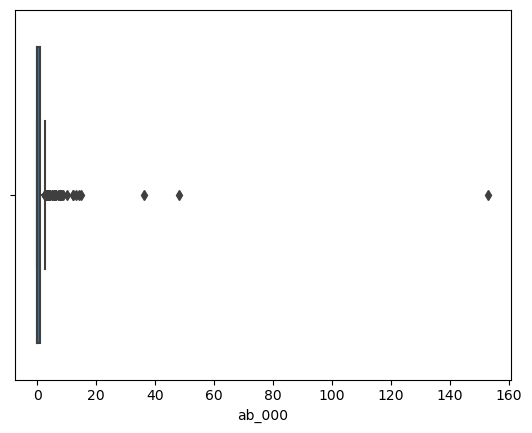

In [46]:
sns.boxplot(x=subset['ab_000'])

<Axes: xlabel='ac_000'>

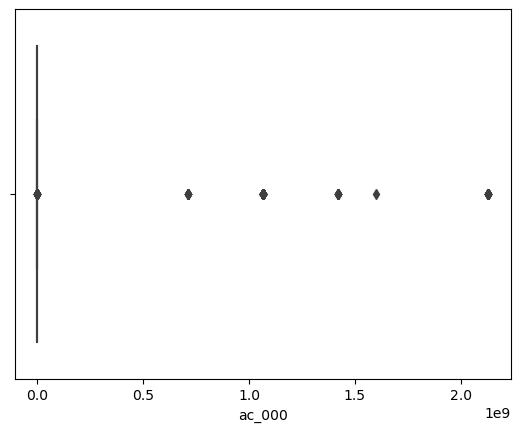

In [47]:
sns.boxplot(x=subset['ac_000'])

The function below is used to identify and remove the outliers based on the interquartile range.
When I used the method shape(), I realized that this procedure of removing the outliers would delete almost 100% of the data rows, thus making it impracticable. Therefore I will not remove the outliers from this dataset.

In [48]:
df_outliers = subset[~((subset<(Q1-1.5*IQR))|(subset>Q3+1.5*IQR)).any(axis=1)]
df_outliers.shape

(8, 171)

### Calculating the sparsity of the dataset

Sparsity is a measurement of how sparse or dense a dataset is. It can be represented as the ratio of the number of zero or missing values to the total number of data points or entries in the dataset. Sparse datasets are characterized by most features having 0 most of the time (Müller and Guido, 2017 p.44).

In [49]:
missing_values = subset.isnull().sum().sum()
zero_values = (subset == 0).sum().sum()

total_data_points = subset.size

sparsity = (missing_values + zero_values) / total_data_points

print(f"Sparsity of the dataset: {sparsity:.3f}")

Sparsity of the dataset: 0.273


The sparsity values must be between 0 and 1 when 0 indicates no sparsity, and 1 indicates completely spaced. The result for this dataset was found to be 0.27, meaning that 27% of the dataset is sparse and has a significant portion of missing or zero values. As I input the missing values with interpolation values, I can rationalise that the zero values alone might contribute to the sparsity.

Printing the 'zero_values' and 'missing_values' I confirmed that hypothesis.

In [50]:
print("Missing values:", missing_values)
print("zero values:", zero_values)

Missing values: 0
zero values: 46656


### Visualizations

In this section, I will obtain the median of each component failure associated with the APS system, and I will use it to create the visualizations.
I am using the median because the data distribution is highly imbalanced, and the outliers distort the mean significantly. Thus, the median is a more accurate measure of the centre of the distribution (Nicholas, 1999, p.3).

In [51]:
subset1 = subset.drop(columns=["class"])

In [52]:
subset1.head()

,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,ag_003,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
23,453236,0.0,2.926000e+03,1420.0,0.0,0.0,0.0,0.0,222.0,323436.0,...,7908038.0,3026002.0,5025350.0,2025766.0,1160638.0,533834.0,493800.0,6914.0,0.0,0.0
60,72504,0.0,1.594000e+03,1052.0,0.0,0.0,0.0,244.0,178226.0,1249396.0,...,1432098.0,372252.0,527514.0,358274.0,332818.0,284178.0,3742.0,0.0,0.0,0.0
115,762958,0.0,1.065353e+09,98.0,0.0,0.0,776.0,281128.0,2186308.0,8123016.0,...,179282.0,85194.0,192889.0,209641.0,115781.0,63662.0,86572.0,7663.0,0.0,0.0
135,695994,1.0,1.300000e+01,12.0,0.0,0.0,0.0,0.0,0.0,55620.0,...,1397742.0,495544.0,361646.0,28610.0,5130.0,212.0,0.0,0.0,0.0,0.0
156,1056758,0.0,4.232800e+04,856.0,0.0,0.0,0.0,50394.0,184552.0,2116260.0,...,1450086.0,713608.0,1750894.0,4054554.0,4096660.0,2295880.0,220478.0,482.0,0.0,0.0


In [53]:
df_median = pd.DataFrame(subset1)
column_medians = df_median.median()
print("Medians for each column:")
print(column_medians)

Medians for each column:
aa_000    584994.0
ab_000         0.0
ac_000       603.0
ad_000       298.0
ae_000         0.0
            ...   
ee_007    909416.0
ee_008     64612.0
ee_009         8.0
ef_000         0.0
eg_000         0.0
Length: 170, dtype: float64


I used the code below to calculate the median for each component failure, and then I created a medians_dataset that I saved.

In [54]:
df_median = pd.DataFrame(subset1)
column_medians = df_median.median()
medians_dataset = pd.DataFrame({'Medians': column_medians})
print(medians_dataset)
medians_dataset.to_csv('medians_dataset.csv', index=False)

         Medians
aa_000  584994.0
ab_000       0.0
ac_000     603.0
ad_000     298.0
ae_000       0.0
...          ...
ee_007  909416.0
ee_008   64612.0
ee_009       8.0
ef_000       0.0
eg_000       0.0

[170 rows x 1 columns]


The bar chart contains the median values for each component failure. As we can see, it is impossible to identify the components because there are 170 features.

From this chart, I can rationalise that some components should have more attention because they have a higher central tendency than others. In the following steps, I will filter the dataset until I find these components to identify which components are failing and deserve more attention.    

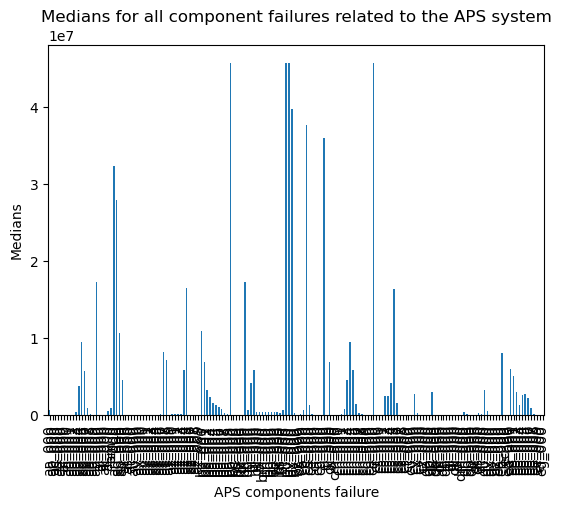

In [55]:
medians_dataset.plot(kind='bar', legend=False)
plt.title('Medians for all component failures related to the APS system')
plt.xlabel('APS components failure')
plt.ylabel('Medians')
plt.xticks(rotation=90)
plt.show()

Here, I will filter the medians less than or equal to zero, and in doing that, I will exclude components specific to the APS system that do not result in component failure. However, we must be careful with these components because it does not precisely mean they did not fail, as the outliers are high.

In [56]:
filtered_medians = medians_dataset[medians_dataset['Medians'] <= 0]
len(filtered_medians)

44

After applying the code above, discover that 44 components (~26%) may not have faults, but it is necessary to verify this information with more data about these components.

However, that information led me to the problem focus, which is that around **74%** of the component's failures are related to the APS system, and it can be a **risk to the safety of the truck drivers** because some of the components should be involved in the **braking and gear changes**.    

Now, I will filter out components greater than zero.

I found 126 components failed and are directly related to the APS system. However, the chart is still overcrowded because of too many components. I will filter again.

In [57]:
filtered_medians1 = medians_dataset[medians_dataset['Medians'] > 0]
len(filtered_medians1)

126

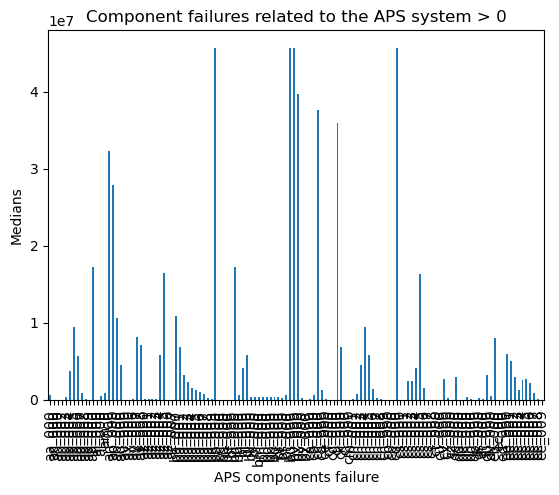

In [58]:
filtered_medians1.plot(kind='bar', legend=False)
plt.title('Component failures related to the APS system > 0')
plt.xlabel('APS components failure')
plt.ylabel('Medians')
plt.xticks(rotation=90)
plt.show()

Applying the code below, I can have median values greater than 0.2e7, and I found 44 components. If I focus even more, it will be possible to see better the component failure of the highest central tendency.

In [59]:
filtered_medians2 = medians_dataset[medians_dataset['Medians'] > 0.2e7]
len(filtered_medians2)

44

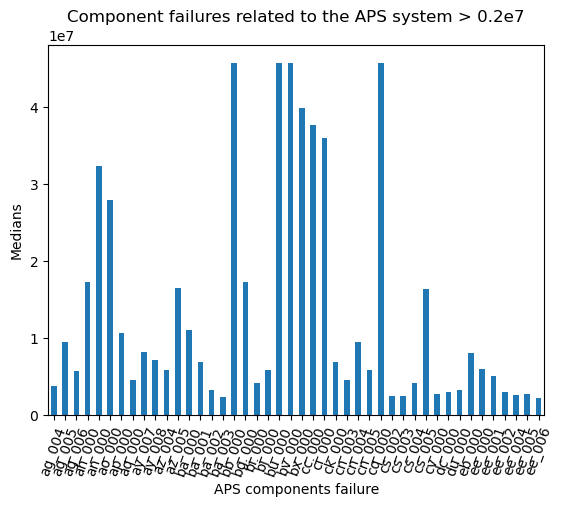

In [60]:
filtered_medians2.plot(kind='bar', legend=False)
plt.title('Component failures related to the APS system > 0.2e7')
plt.xlabel('APS components failure')
plt.ylabel('Medians')
plt.xticks(rotation=70)
plt.show()

After filtering, it becomes easier to see which components presented the highest failure tendency. Although it is essential to focus on 75% of the components that failed by the company in the next year, at least 11 components require significant investment as soon as possible because they present the highest failure tendency. These components are presented in the bar chart below and they are: ah_000, an_000, ao_000, bb_000, bg_000, bu_000, bv_000, bx_000, cc_000, ci_000, and cq_000.  

In [61]:
filtered_medians3 = medians_dataset[medians_dataset['Medians'] > 1.7e7]
len(filtered_medians3)

11

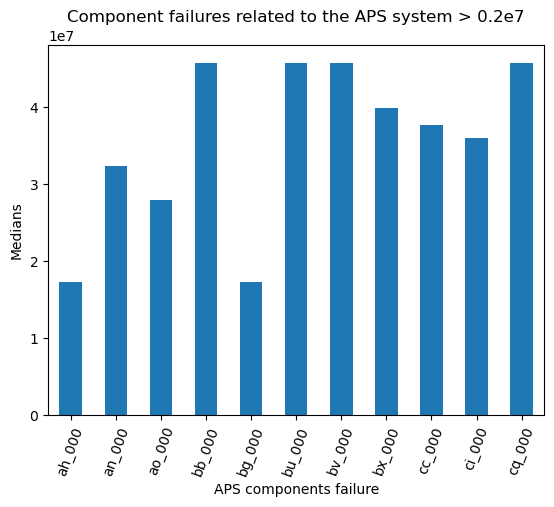

In [62]:
filtered_medians3.plot(kind='bar', legend=False)
plt.title('Component failures related to the APS system > 0.2e7')
plt.xlabel('APS components failure')
plt.ylabel('Medians')
plt.xticks(rotation=70)
plt.show()

### Normalization

When the data is under a systematic source of variation, it is necessary to transform it into a scale suitable for analysis (Muralidharan, 2010, p.1). There are some options to carry out the data transformation, such as normalization, min-max scaling and standardization.

Principal Component Analysis (PCA) is sensitive to the scale of the data, and because of this, it is highly recommended to standardize or normalize the data before applying PCA (Müller and Guido, 2017 p.144). 

Before starting the normalization, I will to drop the 'class' column because the StandardScaler was designed to handle numeric data.

From this process onwards, I will use the entire dataset (df4 - class: 'neg' and 'pos'), because I will apply some machine learning models.

In [63]:
df_normalized = df4.drop(columns=["class"])

In [64]:
df_normalized.shape

(59987, 170)

In [65]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
normalized_data = scaler.fit_transform(df_normalized)

In [66]:
print(normalized_data)

[[ 0.40986329 -0.26454094 -0.45482406 ... -0.17415194 -0.02090469
  -0.02433244]
 [-0.24010848 -0.26454094 -0.45482583 ... -0.11981425 -0.02090469
  -0.02433244]
 [-0.40788527 -0.26454094 -0.45482575 ... -0.17706515 -0.02090469
  -0.02433244]
 ...
 [-0.40721146 -0.26454094  2.26374838 ... -0.17706515 -0.02090469
  -0.02433244]
 [ 0.14406888 -0.26454094  2.26374838 ...  8.02260715 -0.02090469
  -0.02433244]
 [-0.13143378 -0.26454094 -0.45482494 ... -0.17372974 -0.02090469
  -0.02433244]]


### Principal Componente Analysis (PCA) with Normalization

PCA is a technique for data compression and feature extraction with wide use in data analysis and pattern recognition (Xu and Yuille, 1995, p.131).

I will use 'normalized_data' to obtain the number of components needed to retain 99.5% variance in the  entire dataset 'df4'.

To start the PCA analysis I called the PCA instance with 0.995 which is 99.5% variance. Then I fited the PCA model to the data (normalized_data).  

In [67]:
pca = PCA(n_components=0.995).fit(normalized_data)

 The code below calculates the Explained Variance ratio which is the percentage of variance for each component (Lindgren, 2020, p.1).

In [68]:
explained_variance = pca.explained_variance_ratio_

In [69]:
print(explained_variance)

[0.2877842  0.04658935 0.03750794 0.0323299  0.02811992 0.02360971
 0.01927821 0.01775163 0.0173989  0.01549404 0.01427194 0.01385105
 0.01224835 0.01169226 0.01122618 0.01080315 0.01022905 0.01001176
 0.00973988 0.00965696 0.00937369 0.00916556 0.00893095 0.00865188
 0.00800285 0.00777502 0.00772267 0.00753641 0.00731926 0.00719892
 0.00701606 0.00695956 0.00672739 0.00664844 0.00654835 0.00648844
 0.00634936 0.00607756 0.00602035 0.00595056 0.00591929 0.00587245
 0.00581979 0.00566845 0.00565787 0.0055323  0.00550431 0.00542027
 0.00529677 0.00510785 0.00490804 0.00457376 0.00451775 0.00440617
 0.00433196 0.00425922 0.00413777 0.00413117 0.0039834  0.00392956
 0.00375384 0.00367342 0.00359431 0.00344843 0.0033981  0.00335476
 0.00317232 0.0030978  0.00291454 0.00286273 0.00279569 0.00266525
 0.00264046 0.00257442 0.0025296  0.0024903  0.00236754 0.00229354
 0.00224451 0.00214554 0.00212763 0.00207947 0.00204864 0.00203648
 0.00191633 0.00189674 0.0018004  0.00177382 0.00174934 0.0017

In [70]:
explained_variance.shape

(125,)

Now, using this code, I can get a graphic that shows me the number of components I need to set in my PCA model to achieve a cumulated explained variance of almost 100% (I have said 'almost' because only looking in the graphic is not possible to be precisely). However, previously, I indicated that I wanted 99.5% variance, and the explained_variance already showed me that I need at least 125 components to reduce the dimension of the subset and continue with 99.5% variance. 

Text(0, 0.5, 'cumulated explained variance')

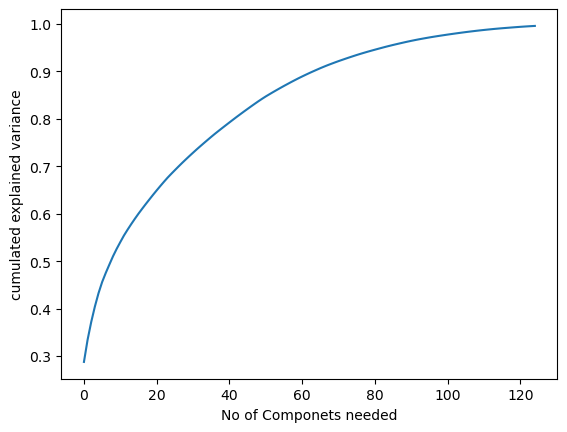

In [71]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel("No of Componets needed")
plt.ylabel("cumulated explained variance")

Here, I inserted the number of components in the PCA model to reduce the dimensions or number of features and continue with the data pattern with 99.5% variance.
The 'projected' part contains the data after the PCA has been applied.

In [72]:
num_components = 125
pca = PCA(n_components=num_components)
projected = pca.fit_transform(normalized_data)

In [73]:
projected

array([[ 5.08979068, -2.37724839, -3.76788197, ...,  0.45932349,
         0.35353966, -0.35194879],
       [-2.07571329, -0.0347313 ,  3.43577992, ...,  0.04180869,
         0.01645809, -0.04220486],
       [-3.27296865,  0.14652146,  1.63611061, ...,  0.02693388,
        -0.01554871,  0.0276571 ],
       ...,
       [-3.13774174,  0.15781761, -0.39457909, ..., -0.01838743,
         0.02630533, -0.01615544],
       [ 2.40788358, -2.65437737, -2.42648433, ...,  0.40205451,
        -0.51225165,  0.66204466],
       [-0.69628711, -0.45728321, -1.15663351, ...,  0.01362918,
        -0.01423505,  0.04582953]])

In [74]:
projected.shape

(59987, 125)

In this part of the code, I am naming the columns with the data projected, with all the principal components.

In [75]:
normalized_data_pca = pd.DataFrame(projected,columns=["C1", "C2", "C3", "C4", "C5", "C6", "C7", "C8", "C9", "C10", "C11", "C12", "C13", "C14", "C15", "C16", "C17", "C18", "C19", "C20", "C21", "C22", "C23", "C24", "C25", "C26", "C27", "C28", "C29", "C30", "C31", "C32", "C33", "C34", "C35", "C36", "C37", "C38", "C39", "C40", "C41", "C42", "C43", "C44", "C45", "C46", "C47", "C48", "C49", "C50", "C51", "C52", "C53", "C54", "C55", "C56", "C57", "C58", "C59", "C60", "C61", "C62", "C63", "C64", "C65", "C66", "C67", "C68", "C69", "C70", "C71", "C72", "C73", "C74", "C75", "C76", "C77", "C78", "C79", "C80","C81", "C82", "C83", "C84", "C85", "C86", "C87", "C88", "C89", "C90", "C91", "C92", "C93", "C94", "C95", "C96", "C97", "C98", "C99", "C100", "C101", "C102", "C103", "C104", "C105", "C106", "C107", "C108", "C109", "C110", "C111", "C112", "C113", "C114", "C115", "C116", "C117", "C118", "C119", "C120", "C121", "C122", "C123", "C124", "C125"])
normalized_data_pca.head()

,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,...,C116,C117,C118,C119,C120,C121,C122,C123,C124,C125
0,5.089791,-2.377248,-3.767882,0.653191,-1.050705,2.418047,-1.509930,0.010781,1.436823,-1.078404,...,0.708885,-0.542932,0.865844,0.173002,-0.240423,-0.071624,-0.140435,0.459323,0.353540,-0.351949
1,-2.075713,-0.034731,3.435780,3.505157,-1.440814,0.801443,-0.058448,0.017311,-0.269839,-0.400969,...,-0.052217,-0.126634,0.250941,0.023216,0.022782,-0.031927,-0.144918,0.041809,0.016458,-0.042205
2,-3.272969,0.146521,1.636111,0.698771,-0.132937,-0.107373,0.192365,-0.000747,0.341206,0.678457,...,0.014393,-0.157905,0.369144,0.045943,0.059193,-0.002164,-0.063512,0.026934,-0.015549,0.027657
3,5.943860,2.214908,-4.006519,2.920174,4.422650,-2.495210,-1.163481,-0.011793,1.043260,2.218713,...,-0.183144,-0.848632,0.351557,-0.023156,0.524224,0.994742,-0.033765,0.523849,-0.272520,-0.624121
4,-3.074409,0.226797,-0.564052,-1.759298,0.798664,-0.460225,0.336497,-0.024180,0.485678,0.948401,...,0.002838,0.000003,0.010187,0.000880,-0.007261,0.000793,0.034086,0.008121,-0.012691,0.003989


In [76]:
normalized_data_pca["class"] = df["class"]

In [77]:
normalized_data_pca.head()

,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,...,C117,C118,C119,C120,C121,C122,C123,C124,C125,class
0,5.089791,-2.377248,-3.767882,0.653191,-1.050705,2.418047,-1.509930,0.010781,1.436823,-1.078404,...,-0.542932,0.865844,0.173002,-0.240423,-0.071624,-0.140435,0.459323,0.353540,-0.351949,neg
1,-2.075713,-0.034731,3.435780,3.505157,-1.440814,0.801443,-0.058448,0.017311,-0.269839,-0.400969,...,-0.126634,0.250941,0.023216,0.022782,-0.031927,-0.144918,0.041809,0.016458,-0.042205,neg
2,-3.272969,0.146521,1.636111,0.698771,-0.132937,-0.107373,0.192365,-0.000747,0.341206,0.678457,...,-0.157905,0.369144,0.045943,0.059193,-0.002164,-0.063512,0.026934,-0.015549,0.027657,neg
3,5.943860,2.214908,-4.006519,2.920174,4.422650,-2.495210,-1.163481,-0.011793,1.043260,2.218713,...,-0.848632,0.351557,-0.023156,0.524224,0.994742,-0.033765,0.523849,-0.272520,-0.624121,neg
4,-3.074409,0.226797,-0.564052,-1.759298,0.798664,-0.460225,0.336497,-0.024180,0.485678,0.948401,...,0.000003,0.010187,0.000880,-0.007261,0.000793,0.034086,0.008121,-0.012691,0.003989,neg


In [78]:
normalized_data_pca['class'].replace('neg', 0, inplace = True)
normalized_data_pca['class'].replace('pos', 1, inplace = True)

In [79]:
normalized_data_pca.head()

,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,...,C117,C118,C119,C120,C121,C122,C123,C124,C125,class
0,5.089791,-2.377248,-3.767882,0.653191,-1.050705,2.418047,-1.509930,0.010781,1.436823,-1.078404,...,-0.542932,0.865844,0.173002,-0.240423,-0.071624,-0.140435,0.459323,0.353540,-0.351949,0
1,-2.075713,-0.034731,3.435780,3.505157,-1.440814,0.801443,-0.058448,0.017311,-0.269839,-0.400969,...,-0.126634,0.250941,0.023216,0.022782,-0.031927,-0.144918,0.041809,0.016458,-0.042205,0
2,-3.272969,0.146521,1.636111,0.698771,-0.132937,-0.107373,0.192365,-0.000747,0.341206,0.678457,...,-0.157905,0.369144,0.045943,0.059193,-0.002164,-0.063512,0.026934,-0.015549,0.027657,0
3,5.943860,2.214908,-4.006519,2.920174,4.422650,-2.495210,-1.163481,-0.011793,1.043260,2.218713,...,-0.848632,0.351557,-0.023156,0.524224,0.994742,-0.033765,0.523849,-0.272520,-0.624121,0
4,-3.074409,0.226797,-0.564052,-1.759298,0.798664,-0.460225,0.336497,-0.024180,0.485678,0.948401,...,0.000003,0.010187,0.000880,-0.007261,0.000793,0.034086,0.008121,-0.012691,0.003989,0


In [80]:
normalized_data_pca["class"].value_counts()

0    58987
1     1000
Name: class, dtype: int64

Below, in the first chart, it is possible to understand how the first and second principal components and data attributes relate. Analysing the data points on the scatter plot, we can see two groups of data (cluster) close to 0, indicating that these points have a similar pattern; as we move away from zero, the clusters are getting more evident and divergent, showing a tendency positive and other the opposite. When I analysed the colour, I saw that the yellow points correspond to a high value, while the purple points to the lowest values. Some outliers can also be seen in this chart.

The second chart presents the third and fourth principal components in a unique cluster with a decreasing tendency with outliers and the concentration of high numbers in the centre, following the cluster shape.

In general, I noted a higher correlation on the first chart than on the second one. In the second chart, the cluster is far from the zero point. Correlation means that changes in PCA values will be linked with changes in the variable of interest.

Another interesting point is related to the Scree Plot (presented below), in which we can see the predominance of the first principal component over the others, which can quickly be confirmed on the first chart below.

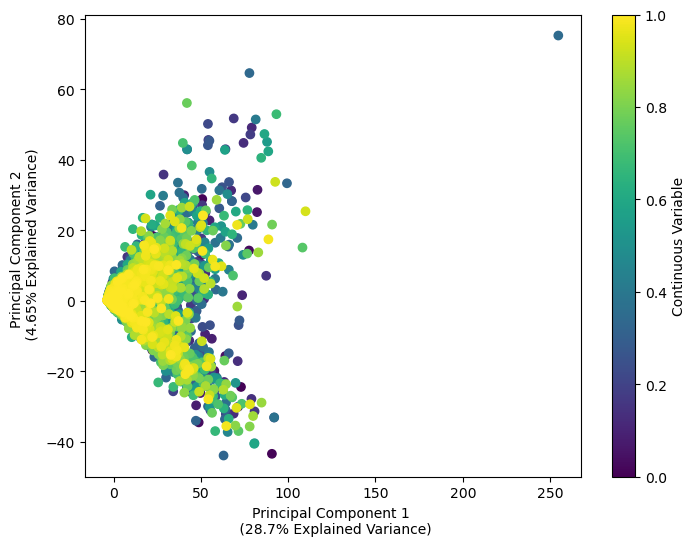

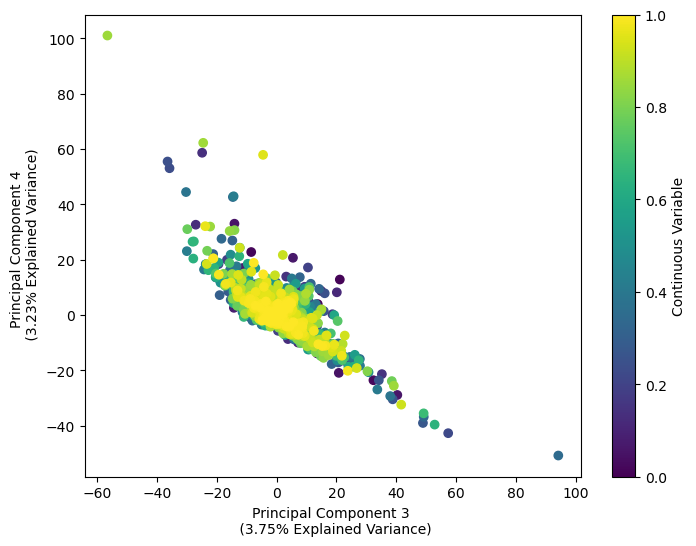

In [81]:
plt.figure(figsize=(8, 6))
continuous_variable = np.linspace(0, 1, 59987)
cmap = plt.get_cmap('viridis')
scatter = plt.scatter(projected[:, 0], projected[:, 1], c=continuous_variable, cmap=cmap)
cbar = plt.colorbar(scatter)
cbar.set_label('Continuous Variable')
plt.xlabel('Principal Component 1 \n (28.7% Explained Variance)')
plt.ylabel('Principal Component 2 \n (4.65% Explained Variance)')
plt.show()

plt.figure(figsize=(8, 6))
continuous_variable = np.linspace(0, 1, 59987)
cmap = plt.get_cmap('viridis')
scatter = plt.scatter(projected[:, 2], projected[:, 3], c=continuous_variable, cmap=cmap)
cbar = plt.colorbar(scatter)
cbar.set_label('Continuous Variable')
plt.xlabel('Principal Component 3 \n (3.75% Explained Variance)')
plt.ylabel('Principal Component 4 \n (3.23% Explained Variance)')
plt.show()

The chart below is called Scree Plot and shows the decreasing rate at which variance is explained by additional principal components (Holland, 2019, p.3), meaning that with the first principal component alone, I have 28.7% of variance, and when I added the second principal component, I found 4.65% variance and so on. Considering the first principal component with the second, there is a significant drop-off in percent variance.

Analysing this chart, I can rationalise that only the first principal component contributed to the highest portion of the variance, and the other principal components contributed a small portion. I assume this significant difference is because of the imbalanced data, as the negative class represents 98% of the dataset.

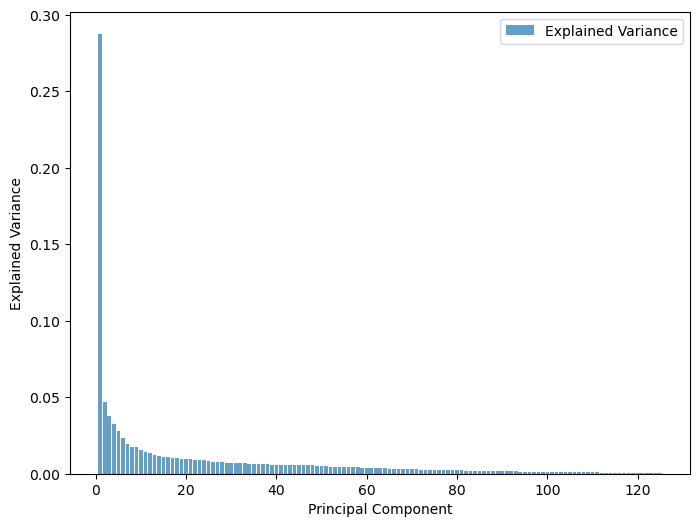

In [82]:
plt.figure(figsize=(8, 6))
plt.bar(np.arange(1, len(explained_variance) + 1), explained_variance, label='Explained Variance', alpha=0.7)
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance')
plt.legend(loc='upper right')
plt.show()

### Assessing ML models using PCA components

After applying the PCA to the entire dataset, the charts have shown that the first principal component dominated the others. The main hypothesis is due to the imbalanced dataset with ~98% of the negative class.
The application of machine learning models will make possible to analyse the predictions and to know if that imbalance is harming the ML performances.

I will use the data generated from the PCA to test the machine-learning models. Below, I attributed the X (independent variables) for the principal components from C1 to C125. I also attributed the y (dependent variable, target) with the class variable, with 'neg' replaced as 0 and 'pos' replaced as 1.   

In [84]:
normalized_data_array = normalized_data_pca.values

In [85]:
normalized_data.shape

(59987, 170)

In [86]:
normalized_data_pca.shape

(59987, 126)

from sklearn.model_selection import train_test_split
X = normalized_data_array[:, 0:125]
y = normalized_data_array[:, 125]
X_train, X_validation, Y_train, Y_validation = train_test_split(X, y, test_size=0.20, random_state=26)

From here, there are libraries and codes to use six different ML models presented in class.

from matplotlib import pyplot
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC

models = []
models.append(('LR', LogisticRegression(solver='liblinear', multi_class='ovr')))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC(gamma='auto')))

results = []
names = []
for name, model in models:
	kfold = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)
	cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring='accuracy')
	results.append(cv_results)
	names.append(name)
	print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))

These numbers refer to the mean accuracy of these models, and the number between parenthesis is its standard deviation.

LR: 0.983079 (0.000156)

LDA: 0.982579 (0.000250)

KNN: 0.983309 (0.000062)

CART: 0.958303 (0.001621)

NB: 0.099877 (0.005023)

SVM: 0.983309 (0.000062)

As shown in these values and the chart below, almost all models presented high accuracy. However, as the data is imbalanced, it is necessary to check the confusion matrix to verify if the model performance is good or not.

pyplot.boxplot(results, labels=names)
pyplot.title('Algorithm Comparison - entire dataset')
pyplot.show()

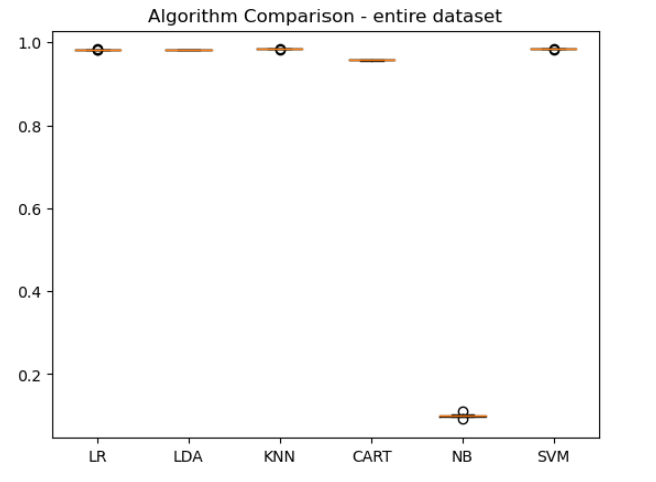

model = SVC(gamma='auto')
model.fit(X_train, Y_train)
predictions = model.predict(X_validation)

from sklearn.metrics import confusion_matrix
import seaborn as sns
cm = confusion_matrix(Y_validation, predictions)
sns.heatmap(cm, annot = True)
plt.title('Confusion Matrix - entire dataset') 

The confusion matrix can provide a more detailed view than the accuracy metric alone. This matrix breaks down each class evaluated in the model. 

Generally, in a good model, performance is expected, with high values on the diagonal from left to right and low values on the other diagonal. The diagonal from left to right has true positives and true negative values, meaning that the models are predicted correctly. The other diagonal has False Negative and Falso positive, meaning the model did not predict well. 

The figure below confirms that despite the high accuracy of the model, the prediction is biased because of the predominance (~98%) of the 'neg' (0) class.

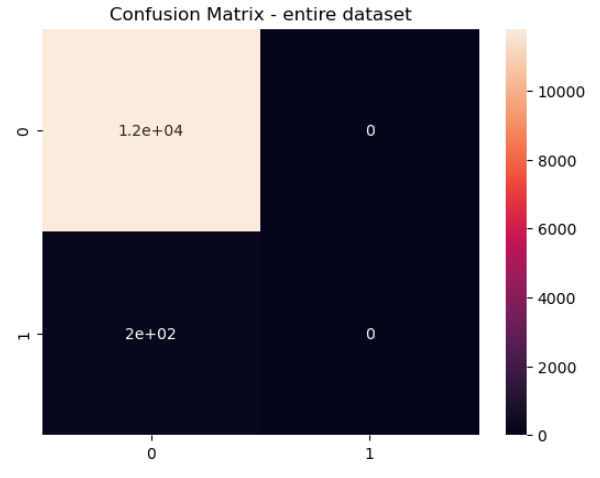

### Oversampling

This dataset is imbalanced, and because of this, it is possible that I found a confusion matrix with a tendency to a specific class ('neg'). However, I will use the Oversampling feature to fill the class ('pos') that is undersampling with data.

In [131]:
df4["class"].value_counts()

0    58988
1      999
Name: class, dtype: int64

In [140]:
df_oversamp = df4

In [141]:
df_oversamp.shape

(59987, 171)

In [93]:
df_oversamp['class'].replace('neg', 0, inplace = True)
df_oversamp['class'].replace('pos', 1, inplace = True)

C:\Users\danie\AppData\Local\Temp\ipykernel_47240\924136933.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_oversamp['class'].replace('neg', 0, inplace = True)
C:\Users\danie\AppData\Local\Temp\ipykernel_47240\924136933.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_oversamp['class'].replace('pos', 1, inplace = True)


In [195]:
X1 = df_oversamp.iloc[:, 0:170]
y1 = df_oversamp.iloc[:, 0]

In [196]:
from collections import Counter

original_class_distribution = Counter(y1)
print("Original Class Distribution:", original_class_distribution)

Original Class Distribution: Counter({0: 58988, 1: 999})


In [197]:
from imblearn.over_sampling import SMOTE
smote = SMOTE()
X1_resampled, y1_resampled = smote.fit_resample(X1, y1)

In [198]:
oversampled_class_distribution = Counter(y1_resampled)
print("Oversampled Class Distribution:", oversampled_class_distribution)

Oversampled Class Distribution: Counter({0: 58988, 1: 58988})


In [199]:
import numpy as np
import pandas as pd

In [200]:
X1_resampled_array = X1_resampled.values
y1_resampled_array = y1_resampled.values
y1_resampled_reshaped = y1_resampled_array.reshape(-1, 1)

In [201]:
resample_dataset = np.column_stack((X1_resampled_array, y1_resampled_reshaped))

Below is the array with the oversampling values. Now, I need to convert it into a DataFrame; then, I will be able to normalize the data and apply the PCA.

In [221]:
resample_dataset.shape

(117976, 171)

In [222]:
df_resample = pd.DataFrame(resample_dataset)

In [223]:
df_resample.head()

,0,1,2,3,4,5,6,7,8,9,...,161,162,163,164,165,166,167,168,169,170
0,0.0,118950.0,0.0,1390.0,1298.0,0.0,0.0,0.0,0.0,0.0,...,1677646.0,1380302.0,2531322.0,426284.0,17996.0,11734.0,12506.0,138.0,0.0,0.0
1,0.0,24416.0,0.0,0.0,666.0,0.0,0.0,0.0,0.0,0.0,...,190606.0,95674.0,207476.0,232470.0,154962.0,99406.0,121544.0,2712.0,0.0,0.0
2,0.0,14.0,0.0,62.0,34.0,0.0,0.0,0.0,0.0,0.0,...,248.0,42.0,48.0,28.0,32.0,10.0,0.0,0.0,0.0,0.0
3,0.0,31300.0,0.0,784.0,740.0,0.0,0.0,0.0,0.0,0.0,...,798872.0,112724.0,51736.0,7054.0,6628.0,27600.0,2.0,2.0,0.0,0.0
4,0.0,736.0,2.0,24.0,22.0,16.0,20.0,0.0,0.0,0.0,...,1370.0,812.0,2488.0,2340.0,2566.0,20870.0,38.0,0.0,0.0,0.0


After verifying if there are missing or null values after the oversampling, I confirmed that there are not, and now I can proceed to the normalization process.

In [224]:
df_resample.isnull().sum()

0      0
1      0
2      0
3      0
4      0
      ..
166    0
167    0
168    0
169    0
170    0
Length: 171, dtype: int64

In [225]:
df_resample.shape

(117976, 171)

In [229]:
df_resample.head()

,0,1,2,3,4,5,6,7,8,9,...,161,162,163,164,165,166,167,168,169,170
0,0.0,118950.0,0.0,1390.0,1298.0,0.0,0.0,0.0,0.0,0.0,...,1677646.0,1380302.0,2531322.0,426284.0,17996.0,11734.0,12506.0,138.0,0.0,0.0
1,0.0,24416.0,0.0,0.0,666.0,0.0,0.0,0.0,0.0,0.0,...,190606.0,95674.0,207476.0,232470.0,154962.0,99406.0,121544.0,2712.0,0.0,0.0
2,0.0,14.0,0.0,62.0,34.0,0.0,0.0,0.0,0.0,0.0,...,248.0,42.0,48.0,28.0,32.0,10.0,0.0,0.0,0.0,0.0
3,0.0,31300.0,0.0,784.0,740.0,0.0,0.0,0.0,0.0,0.0,...,798872.0,112724.0,51736.0,7054.0,6628.0,27600.0,2.0,2.0,0.0,0.0
4,0.0,736.0,2.0,24.0,22.0,16.0,20.0,0.0,0.0,0.0,...,1370.0,812.0,2488.0,2340.0,2566.0,20870.0,38.0,0.0,0.0,0.0


I will rename the columns below.

In [233]:
df1_ = pd.DataFrame(df4)
df1_resample = pd.DataFrame(df_resample)

In [234]:
df1_resample.columns = df1_.columns

In [235]:
df1_resample.head()

,class,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,0.0,118950.0,0.0,1390.0,1298.0,0.0,0.0,0.0,0.0,0.0,...,1677646.0,1380302.0,2531322.0,426284.0,17996.0,11734.0,12506.0,138.0,0.0,0.0
1,0.0,24416.0,0.0,0.0,666.0,0.0,0.0,0.0,0.0,0.0,...,190606.0,95674.0,207476.0,232470.0,154962.0,99406.0,121544.0,2712.0,0.0,0.0
2,0.0,14.0,0.0,62.0,34.0,0.0,0.0,0.0,0.0,0.0,...,248.0,42.0,48.0,28.0,32.0,10.0,0.0,0.0,0.0,0.0
3,0.0,31300.0,0.0,784.0,740.0,0.0,0.0,0.0,0.0,0.0,...,798872.0,112724.0,51736.0,7054.0,6628.0,27600.0,2.0,2.0,0.0,0.0
4,0.0,736.0,2.0,24.0,22.0,16.0,20.0,0.0,0.0,0.0,...,1370.0,812.0,2488.0,2340.0,2566.0,20870.0,38.0,0.0,0.0,0.0


In [304]:
df1_resample.shape

(117976, 171)

In [305]:
df1_resample['class'].dtype

dtype('float64')

In [306]:
df1_resample['class'] = df1_resample['class'].astype(int)

In [307]:
df1_resample['class'].dtype

dtype('int32')

In [308]:
df1_resample['class'].unique()

array([0, 1])

At the end of the oversampling process, I found that both classes ('neg' and 'pos') have the same number of rows, meaning that the dataset is not more imbalanced and tends not to cause bias in the ML models and PCA.

### Normalizing the oversampling values

Now, I will normalize the data after the oversampling to guarantee that neither class will be predominant.

In [309]:
df_resample_normalized = df1_resample.drop(columns=["class"])

In [310]:
df_resample_normalized.shape

(117976, 170)

In [311]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
normalized2_data = scaler.fit_transform(df_resample_normalized)

In [312]:
print(normalized2_data)

[[-0.53982059 -0.24764468 -0.41790441 ... -0.21261532 -0.04081969
  -1.        ]
 [-0.76570661 -0.24764468 -0.41790652 ... -0.19412035 -0.04081969
  -1.        ]
 [-0.82401443 -0.24764468 -0.41790643 ... -0.21360689 -0.04081969
  -1.        ]
 ...
 [ 1.1265136   0.2595433  -0.41790644 ... -0.21360689 -0.04081969
   1.        ]
 [ 0.43205038 -0.24764468 -0.41790335 ... -0.21275011 -0.04081969
   1.        ]
 [ 0.26562867  0.2960555  -0.41790595 ...  1.83261105 -0.04081969
   1.        ]]


### PCA with Oversampling and Normalization

Here, I will start the PCA process with the oversampling and normalized dataset.

In [313]:
pca = PCA(n_components=0.995).fit(normalized2_data)

In [314]:
explained_variance_oversample = pca.explained_variance_ratio_

In [315]:
print(explained_variance_oversample)

[0.27893286 0.06497206 0.0455975  0.03273914 0.03134678 0.02778458
 0.02331767 0.02076077 0.01862152 0.01775115 0.01668436 0.01516103
 0.01289411 0.01263898 0.01239503 0.01108286 0.01027248 0.0100616
 0.00995767 0.00964465 0.00934132 0.00880466 0.00863734 0.00790633
 0.00772183 0.00760972 0.00751571 0.00712199 0.00683951 0.00677251
 0.00645566 0.00643354 0.00638112 0.00622324 0.00618227 0.00601307
 0.00596589 0.00591723 0.0058512  0.0057995  0.00570495 0.00565411
 0.00558643 0.00534925 0.00518616 0.00498251 0.00493168 0.00488656
 0.00476443 0.00463248 0.00438401 0.00409315 0.00404629 0.00379006
 0.00374732 0.00366027 0.00358088 0.00343132 0.00334846 0.00330817
 0.00311087 0.00298446 0.00291888 0.00287106 0.00277142 0.00272206
 0.00251137 0.00246017 0.00234624 0.00227758 0.00220551 0.00218788
 0.00217161 0.00210815 0.00196707 0.00189789 0.00186769 0.00181079
 0.00172798 0.0016819  0.00162402 0.0015463  0.00152025 0.0014701
 0.00141186 0.00138003 0.00133577 0.00127177 0.00126728 0.001253

In [316]:
explained_variance_oversample.shape

(120,)

In the chart below, we can see that the curve is still similar to the data imbalanced, but in this one, I can see an improvement, which is in the reduction of the number of principal components. The imbalance data obtained 125 principal components.   

Text(0, 0.5, 'cumulated explained variance')

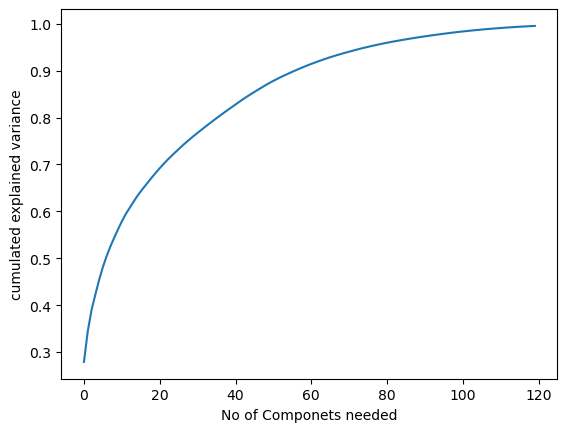

In [317]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel("No of Componets needed")
plt.ylabel("cumulated explained variance")

In [318]:
num_components = 120
pca = PCA(n_components=num_components)
projected_oversample = pca.fit_transform(normalized2_data)

In [319]:
projected_oversample

array([[-2.95480470e+00, -1.18484354e+00,  1.72662901e+00, ...,
         5.35249808e-02, -3.11401182e-01,  3.21186858e-01],
       [-5.87275865e+00, -6.59391047e-01, -2.98180250e+00, ...,
        -3.56407498e-02, -2.04102492e-01, -1.05122878e-02],
       [-6.10946592e+00, -4.55210979e-01, -1.54463952e+00, ...,
         1.74720091e-03, -1.25969765e-01, -2.64145291e-02],
       ...,
       [-5.52078312e-01,  3.02834740e-01, -6.05021518e-01, ...,
         7.02884895e-02,  2.89588842e-01,  1.06869911e-01],
       [ 2.88834522e+00,  4.41915079e+00,  1.65981550e+00, ...,
         5.96694884e-01, -1.05594370e-01, -6.68976652e-01],
       [ 3.30822801e+00, -2.35856446e+00,  3.41488581e+00, ...,
        -4.35616187e-01,  5.43501976e-01,  9.58962757e-02]])

In [320]:
projected_oversample.shape

(117976, 120)

In [321]:
oversample_data_pca = pd.DataFrame(projected_oversample,columns=["C1", "C2", "C3", "C4", "C5", "C6", "C7", "C8", "C9", "C10", "C11", "C12", "C13", "C14", "C15", "C16", "C17", "C18", "C19", "C20", "C21", "C22", "C23", "C24", "C25", "C26", "C27", "C28", "C29", "C30", "C31", "C32", "C33", "C34", "C35", "C36", "C37", "C38", "C39", "C40", "C41", "C42", "C43", "C44", "C45", "C46", "C47", "C48", "C49", "C50", "C51", "C52", "C53", "C54", "C55", "C56", "C57", "C58", "C59", "C60", "C61", "C62", "C63", "C64", "C65", "C66", "C67", "C68", "C69", "C70", "C71", "C72", "C73", "C74", "C75", "C76", "C77", "C78", "C79", "C80","C81", "C82", "C83", "C84", "C85", "C86", "C87", "C88", "C89", "C90", "C91", "C92", "C93", "C94", "C95", "C96", "C97", "C98", "C99", "C100", "C101", "C102", "C103", "C104", "C105", "C106", "C107", "C108", "C109", "C110", "C111", "C112", "C113", "C114", "C115", "C116", "C117", "C118", "C119", "C120"])
oversample_data_pca.head()

,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,...,C111,C112,C113,C114,C115,C116,C117,C118,C119,C120
0,-2.954805,-1.184844,1.726629,1.470183,-0.093055,0.164206,-0.554920,0.469718,0.350060,-0.024186,...,-0.114670,-0.654885,0.874459,-0.351668,0.166279,0.762895,-0.349181,0.053525,-0.311401,0.321187
1,-5.872759,-0.659391,-2.981802,-2.754331,5.259322,-0.657399,-0.216356,-0.671767,-0.714010,0.030480,...,-0.532287,-0.319746,0.386284,-0.110241,-0.292422,0.030581,0.135889,-0.035641,-0.204102,-0.010512
2,-6.109466,-0.455211,-1.544640,-0.645157,1.700530,-0.092422,-0.296445,-0.324139,-0.481390,0.010170,...,-0.466748,-0.308212,0.319218,-0.004564,-0.174172,0.031885,0.132629,0.001747,-0.125970,-0.026415
3,-2.640085,0.899118,1.835963,0.833636,-0.806258,0.564307,0.813239,2.525938,2.341610,-0.047942,...,-0.005850,-0.726630,0.571365,0.405372,-0.201723,-0.231339,0.342108,0.197366,-0.374218,-0.216286
4,-5.849543,-0.290184,0.095786,1.473426,-1.575266,0.411539,-0.250499,-0.041656,0.003817,-0.016344,...,-0.062635,-0.031707,0.041112,0.019404,0.034370,-0.007213,0.003649,0.006353,0.024224,0.002742


In [322]:
oversample_data_pca["class"] = df1_resample["class"]
oversample_data_pca.head()

,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,...,C112,C113,C114,C115,C116,C117,C118,C119,C120,class
0,-2.954805,-1.184844,1.726629,1.470183,-0.093055,0.164206,-0.554920,0.469718,0.350060,-0.024186,...,-0.654885,0.874459,-0.351668,0.166279,0.762895,-0.349181,0.053525,-0.311401,0.321187,0
1,-5.872759,-0.659391,-2.981802,-2.754331,5.259322,-0.657399,-0.216356,-0.671767,-0.714010,0.030480,...,-0.319746,0.386284,-0.110241,-0.292422,0.030581,0.135889,-0.035641,-0.204102,-0.010512,0
2,-6.109466,-0.455211,-1.544640,-0.645157,1.700530,-0.092422,-0.296445,-0.324139,-0.481390,0.010170,...,-0.308212,0.319218,-0.004564,-0.174172,0.031885,0.132629,0.001747,-0.125970,-0.026415,0
3,-2.640085,0.899118,1.835963,0.833636,-0.806258,0.564307,0.813239,2.525938,2.341610,-0.047942,...,-0.726630,0.571365,0.405372,-0.201723,-0.231339,0.342108,0.197366,-0.374218,-0.216286,0
4,-5.849543,-0.290184,0.095786,1.473426,-1.575266,0.411539,-0.250499,-0.041656,0.003817,-0.016344,...,-0.031707,0.041112,0.019404,0.034370,-0.007213,0.003649,0.006353,0.024224,0.002742,0


In [323]:
oversample_data_pca["class"].value_counts()

0    58988
1    58988
Name: class, dtype: int64

Comparing the charts below with imbalanced data, I realized that for the first chart they are similar, except for the density of the data point, which is expected because of the oversampling.

The second chart shows a slight tendency to decrease compared to the imbalanced data, and the amplitude of the values has also been reduced.

Similar to the imbalance data, the first chart has a high correlation. However, the second chart for the oversampling data has shown a higher correlation than the imbalanced data (second chart).  

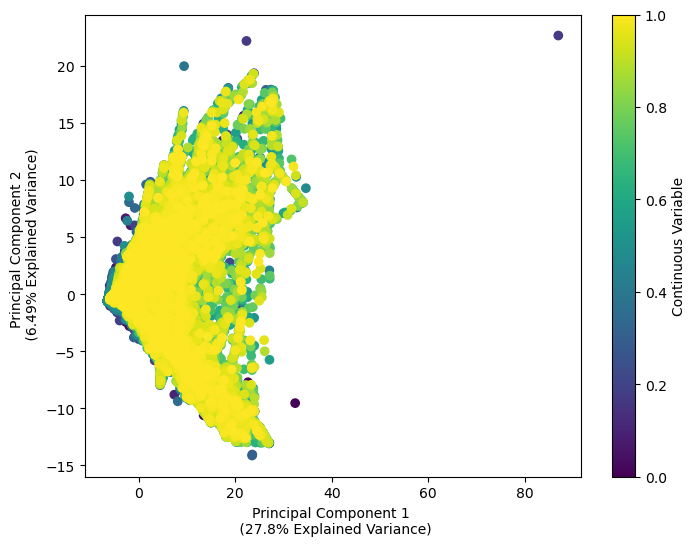

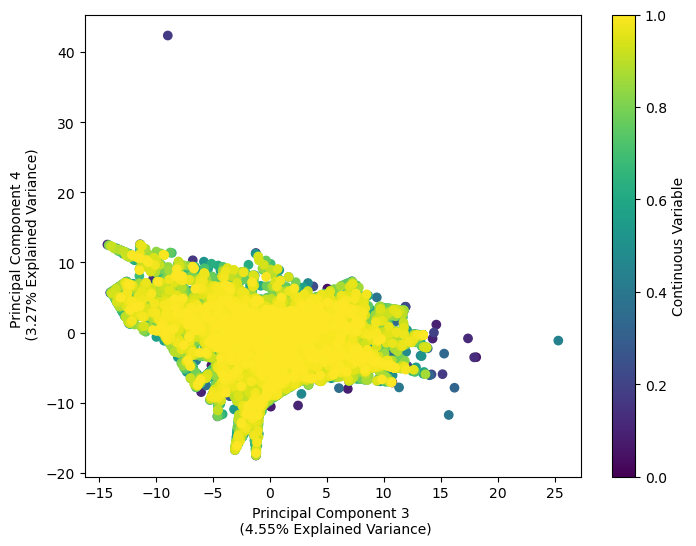

In [327]:
plt.figure(figsize=(8, 6))
continuous_variable = np.linspace(0, 1, 117976)
cmap = plt.get_cmap('viridis')
scatter = plt.scatter(projected_oversample[:, 0], projected_oversample[:, 1], c=continuous_variable, cmap=cmap)
cbar = plt.colorbar(scatter)
cbar.set_label('Continuous Variable')
plt.xlabel('Principal Component 1 \n (27.8% Explained Variance)')
plt.ylabel('Principal Component 2 \n (6.49% Explained Variance)')
plt.show()

plt.figure(figsize=(8, 6))
continuous_variable = np.linspace(0, 1, 117976)
cmap = plt.get_cmap('viridis')
scatter = plt.scatter(projected_oversample[:, 2], projected_oversample[:, 3], c=continuous_variable, cmap=cmap)
cbar = plt.colorbar(scatter)
cbar.set_label('Continuous Variable')
plt.xlabel('Principal Component 3 \n (4.55% Explained Variance)')
plt.ylabel('Principal Component 4 \n (3.27% Explained Variance)')
plt.show()

Both charts (imbalanced data and oversampling) are similar, including the variance values. The positive point is that the first principal component presented a slight reduction, and the others had a small increase.  

For some reason, even with the oversampling and normalization processes, the first principal component is continually weighed over the other. To fix it, I would try another scaling feature or verify again if I can remove some columns or rows without losing the data integrity.

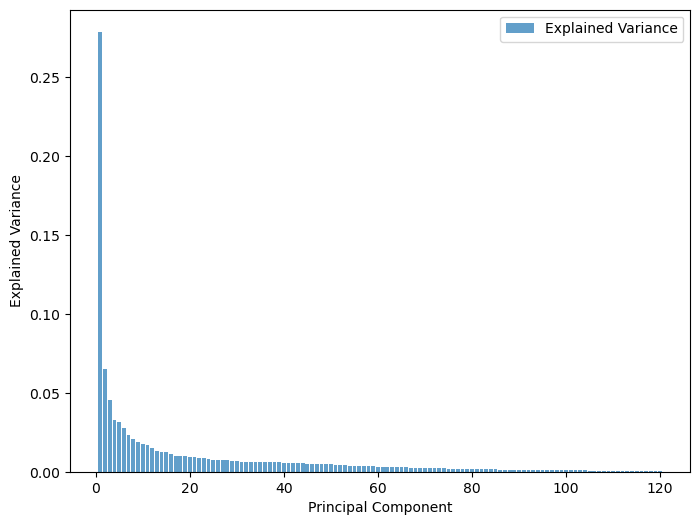

In [325]:
plt.figure(figsize=(8, 6))
plt.bar(np.arange(1, len(explained_variance_oversample) + 1), explained_variance_oversample, label='Explained Variance', alpha=0.7)
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance')
plt.legend(loc='upper right')
plt.show()

### Assessing ML using PCA with Oversampling and Normalization

In [331]:
normalized2_data_array = oversample_data_pca.values

In [332]:
normalized2_data.shape

(117976, 170)

In [333]:
oversample_data_pca.shape

(117976, 121)

from sklearn.model_selection import train_test_split
X = normalized2_data_array[:, 0:120]
y = normalized2_data_array[:, 120]
X_train, X_validation, Y_train, Y_validation = train_test_split(X, y, test_size=0.20, random_state=17)

from matplotlib import pyplot
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC

models = []
models.append(('LR', LogisticRegression(solver='liblinear', multi_class='ovr')))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC(gamma='auto')))

results = []
names = []
for name, model in models:
	kfold = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)
	cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring='accuracy')
	results.append(cv_results)
	names.append(name)
	print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))

LR: 0.999968 (0.000049)

LDA: 0.999989 (0.000032)

KNN: 0.994268 (0.000704)

CART: 0.992445 (0.000975)

NB: 0.846631 (0.004727)

SVM: 0.998644 (0.000303)

pyplot.boxplot(results, labels=names)
pyplot.title('Algorithm Comparison - oversampling')
pyplot.show()

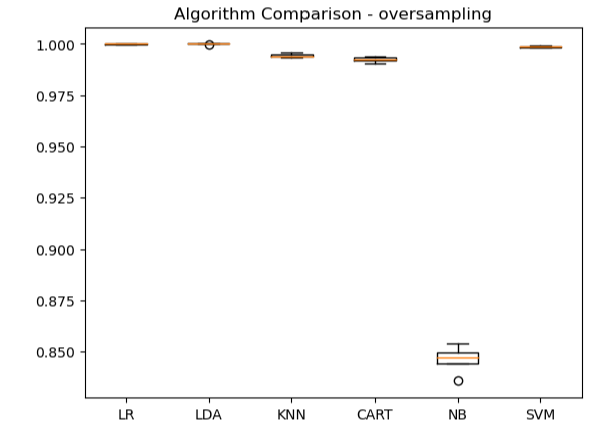

model = SVC(gamma='auto')
model.fit(X_train, Y_train)
predictions = model.predict(X_validation)

from sklearn.metrics import confusion_matrix
import seaborn as sns
cm = confusion_matrix(Y_validation, predictions)
sns.heatmap(cm, annot = True)
plt.title('Confusion Matrix - oversampling') 

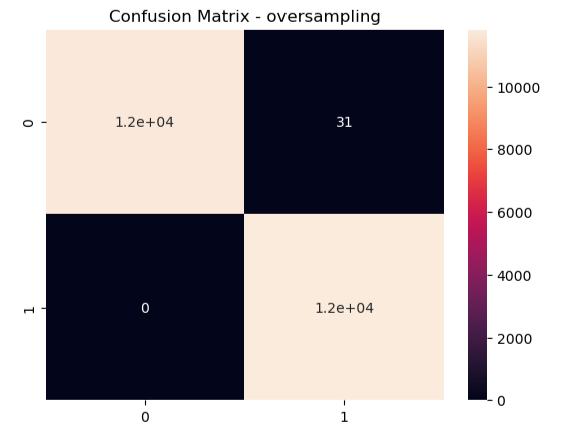

### PCA without normalization

In this part, I will check if the normalization process improved my analysis. I only repeated the process as I did above, and at the end of this part, I will provide some inferences about what I found in this analysis. Then, I will also apply the ML models to double-check the efficiency of the normalization process in this dataset. 

In [275]:
df_no_normal = df4.drop(columns=["class"])

In [279]:
pca = PCA(n_components=0.995).fit(df_no_normal)

In [282]:
explained_variance_no_norm = pca.explained_variance_ratio_

In [283]:
print(explained_variance_no_norm)

[0.97439135 0.01492833 0.00584559]


In [284]:
explained_variance_no_norm.shape

(3,)

Text(0, 0.5, 'cumulated explained variance')

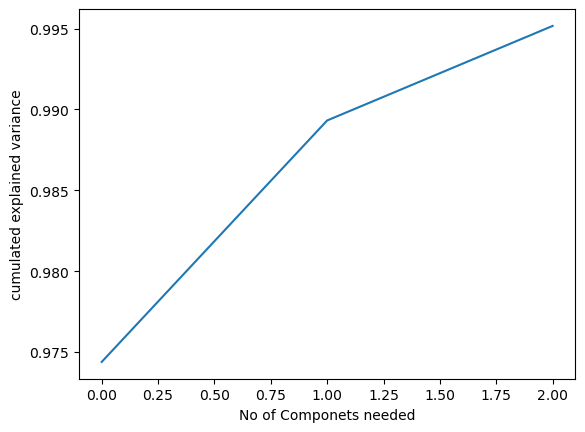

In [285]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel("No of Componets needed")
plt.ylabel("cumulated explained variance")

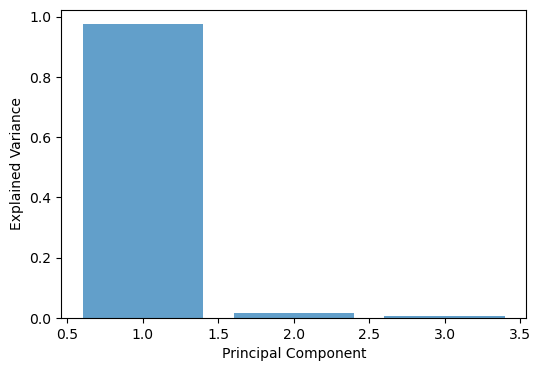

In [286]:
plt.figure(figsize=(6, 4))
plt.bar(np.arange(1, len(explained_variance_no_norm) + 1), explained_variance_no_norm, label='Explained Variance', alpha=0.7)
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance')
plt.show()

In [287]:
num_components = 3
pca = PCA(n_components=num_components)
projected_no_normal = pca.fit_transform(df_no_normal)

In [288]:
projected_no_normal

array([[-3.56296500e+08, -2.69009396e+06, -3.35152962e+05],
       [-3.56444126e+08, -5.53313835e+06, -2.75095369e+05],
       [-3.56442586e+08, -5.96200703e+06, -2.65462630e+05],
       ...,
       [ 1.77424947e+09, -4.73545374e+06,  3.43929560e+04],
       [ 1.77419765e+09, -2.22053587e+06, -5.95862177e+04],
       [-3.56547567e+08, -4.47761759e+06, -3.37183453e+05]])

In [289]:
projected_no_normal.shape

(59987, 3)

In [290]:
projected_no_normal_pca = pd.DataFrame(projected_no_normal,columns=["C1", "C2", "C3"])
projected_no_normal_pca.head()

,C1,C2,C3
0,-3.562965e+08,-2.690094e+06,-335152.961988
1,-3.564441e+08,-5.533138e+06,-275095.368845
2,-3.564426e+08,-5.962007e+06,-265462.630370
3,-3.564795e+08,4.209943e+06,-313736.069080
4,-3.564424e+08,-5.938132e+06,-265561.813546


In [291]:
projected_no_normal_pca["class"] = df["class"]
projected_no_normal_pca.head()

,C1,C2,C3,class
0,-3.562965e+08,-2.690094e+06,-335152.961988,neg
1,-3.564441e+08,-5.533138e+06,-275095.368845,neg
2,-3.564426e+08,-5.962007e+06,-265462.630370,neg
3,-3.564795e+08,4.209943e+06,-313736.069080,neg
4,-3.564424e+08,-5.938132e+06,-265561.813546,neg


In [292]:
projected_no_normal_pca['class'].replace('neg', 0, inplace = True)
projected_no_normal_pca['class'].replace('pos', 1, inplace = True)

In [293]:
projected_no_normal_pca.head()

,C1,C2,C3,class
0,-3.562965e+08,-2.690094e+06,-335152.961988,0
1,-3.564441e+08,-5.533138e+06,-275095.368845,0
2,-3.564426e+08,-5.962007e+06,-265462.630370,0
3,-3.564795e+08,4.209943e+06,-313736.069080,0
4,-3.564424e+08,-5.938132e+06,-265561.813546,0


In [294]:
projected_no_normal_pca["class"].value_counts()

0    58987
1     1000
Name: class, dtype: int64

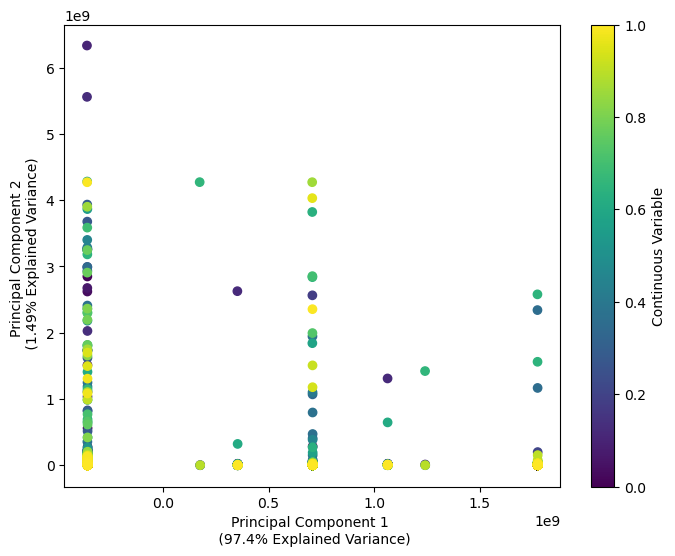

In [295]:
plt.figure(figsize=(8, 6))
continuous_variable = np.linspace(0, 1, 59987)
cmap = plt.get_cmap('viridis')
scatter = plt.scatter(projected_no_normal[:, 0],projected_no_normal[:, 1], c=continuous_variable, cmap=cmap)
cbar = plt.colorbar(scatter)
cbar.set_label('Continuous Variable')
plt.xlabel('Principal Component 1 \n (97.4% Explained Variance)')
plt.ylabel('Principal Component 2 \n (1.49% Explained Variance)')
plt.show()

Normalization is a process that puts all features on the same scale for PCA and ML analysis. PCA  is necessary not to give higher weight to certain features than others and in ML to avoid bias because of the mathematical process that can generate bigger or smaller numbers, which can benefit one feature over others. 

The charts above showed that without normalization, the first principal component dominated with 97.4% of the variance, probably because of the 'neg' class. In addition, we only have two main components with values lower than 1.5% of the variance, which means that the smallest values from the original features were ignored for the PCA model. We can confirm it in the chart above with a predominance of high values. 

### Assessing ML models using PCA components without Normalization

In [124]:
df_no_normal_array = projected_no_normal_pca.values

In [125]:
df_no_normal.shape

(59987, 170)

In [126]:
projected_no_normal_pca.shape

(59987, 4)

from sklearn.model_selection import train_test_split
X = df_no_normal_array[:, 0:3]
y = df_no_normal_array[:, 3]
X_train, X_validation, Y_train, Y_validation = train_test_split(X, y, test_size=0.20, random_state=46)

from matplotlib import pyplot
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC

In [129]:
models = []
models.append(('LR', LogisticRegression(solver='liblinear', multi_class='ovr')))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC(gamma='auto')))

results = []
names = []
for name, model in models:
	kfold = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)
	cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring='accuracy')
	results.append(cv_results)
	names.append(name)
	print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))

These numbers refer to the mean accuracy of these models, and the number between parenthesis is its standard deviation.

LR: 0.828294 (0.051709)

LDA: 0.983100 (0.000062)

KNN: 0.983038 (0.000102)

CART: 0.965138 (0.002169)

NB: 0.133508 (0.283209)

SVM: 0.983121 (0.000001)

Almost all models presented high accuracy, except the NB model, that also presented high error. We can see it on the chart below. If we compare these results with the results obtained with normalized data, we can see that they are very similar, except for the LR model, that is lower for the present data (without normalization).

I will check the confusion matrix to verify if the model performance is the same as with normalized data; this is likely because of what we saw in the PCA, where the 'neg' class is predominant over others.

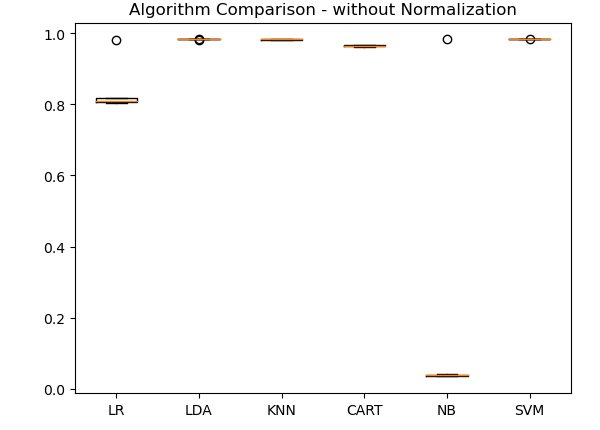

pyplot.boxplot(results, labels=names)
pyplot.title('Algorithm Comparison - without Normalization')
pyplot.show()

model = SVC(gamma='auto')
model.fit(X_train, Y_train)
predictions = model.predict(X_validation)

from sklearn.metrics import confusion_matrix
import seaborn as sns
cm = confusion_matrix(Y_validation, predictions)
sns.heatmap(cm, annot = True)
plt.title('Confusion Matrix - without Normalization') 

As we can see the confusion matrix presented the same result as for normalized data. It clearly shows that the model is biased because of the predominace of the 'neg' class. 

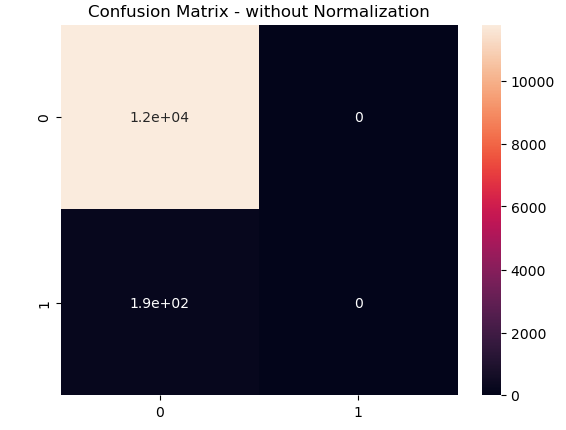

### Conclusions:

The analysis allowed me to conclude that from the entire dataset, approximately 2% were related to component failure in specific components of the APS system. Focusing on this part, I obtained that ~26% of the components may have been working correctly without fail. Still, it is necessary to verify if this data results from a misfunction of the components or problems in the data collection or manipulation.

On the other hand, around 74% of the components related to the APS system presented failure. Therefore, all 126 components need investment by the company in the upcoming year. However, considering that the highest failure tendency occurs in at least 11 components, these require significant attention as soon as possible because they may increase the risk to the safety of truck drivers because they are involved in main functions such as braking and gear changes.


##### Conclusion about the methods:
After assessments of data normalized and non-normalized, it was clear that it was essential to the normalization process previously the application of PCA and ML training. Furthermore, even with normalization, there is a high probability of getting biased ML results if one class dominates.

Generally, the results for PCA with normalized data were much more coherent despite the 'neg' class domination because the features with low values were considered in the calculations, which did not happen in the non-normalized data, and the 'neg' dominated probably because of the massive number of records.

### References

Holland, Steve M. (2019). *Principal Components Analysis (PCA)*. [online] Available at: http://stratigrafia.org/8370/handouts/pcaTutorial.pdf (Accessed: 4 November 2023).

Lindgren, I. (2020). Dealing with Highly Dimensional Data using Principal Component Analysis (PCA). Available at: https://towardsdatascience.com/dealing-with-highly-dimensional-data-using-principal-component-analysis-pca-fea1ca817fe6 
(Accessed:30 October 2023).

Müller, A. C. and Guido, S. (2017). *Introduction to machine learning with Python: a guide for data scientists*. 1st ed. United States of America. O’reilly Media. 

Muralidharan, K. (2010). A Note on Transformation, Standardization and Normalization. *Social Science Research Network*, 9, pp.116–122.

Nicholas, J. (1999). *Introduction to Descriptive Statistics*. Sydney: Mathematics Learning Centre, University Of Sydney.

Panzner, M. et al. (2022). ‘Characterization of Usage Data with the Help of Data Classifications’, *Journal of the Knowledge Economy* [Preprint]. Available at: https://search.ebscohost.com/login.aspx?direct=true&db=edsair&AN=edsair.doi...........8017c54a020b9debf67ec56928155640&site=eds-live&scope=site (Accessed: 25 October 2023).

Sagala, N. T. M. and Aryatama, F. Y. (2022). ‘Exploratory Data Analysis (EDA): A Study of Olympic Medallist’. *Sistemasi: Jurnal Sistem Informasi*, 11(3), pp. 578–587. doi:10.32520/stmsi.v11i3.1857

Sahoo, K. *et al*. (2019). “Exploratory Data Analysis using Python,” *Int. J. Innov. Technol. Explor. Eng.*, vol. 8, no. 12, pp. 4727–4735.DOI: 10.35940/ijitee.L3591.1081219

Xu, L. and Yuille, A. L. (1995). Robust principal component analysis by self-organizing rules based on statistical physics approach. *IEEE Transactions on Neural Networks*, 6(1), pp.131–143. doi:https://doi.org/10.1109/72.363442.